In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./lru.csv')
df1 = pd.read_csv('./policy_comparison1.csv')

df.head()

,replacement,policy,trace,ipc
0,lru,l3exclusive,bc-0,0.135735
1,lru,l3exclusive,bc-12,0.132027
2,lru,l3exclusive,bc-3,0.157031
3,lru,l3exclusive,bc-5,0.208691
4,lru,l3exclusive,bfs-10,0.262584


### IPC at different policies

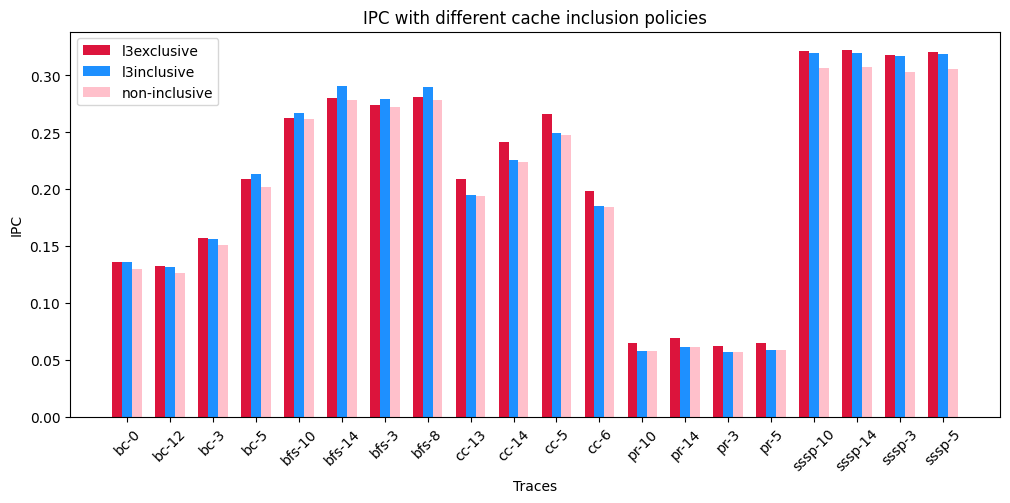

In [49]:
N = 20
ind = np.arange(N) 
width = 0.23
  
l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])

plt.figure(figsize=(12,5))
bar1 = plt.bar(ind, l3ex, width, color = 'crimson')
bar2 = plt.bar(ind+width, l3inc, width, color='dodgerblue')
bar3 = plt.bar(ind+width*2, cache, width, color = 'pink')

plt.xlabel("Traces")
plt.ylabel('IPC')
plt.title("IPC with different cache inclusion policies")

plt.xticks(ind+width,df['trace'].unique(), rotation = 45)
plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'non-inclusive') )
plt.savefig("ipc_policyComparison.jpg")
plt.show()

### Speed Up

Speed Up = $\frac{IPC_{new}}{IPC_{baseline}}$ , assuming baseline as (bimodal, no prefetcher, LRU, non-inclusive)

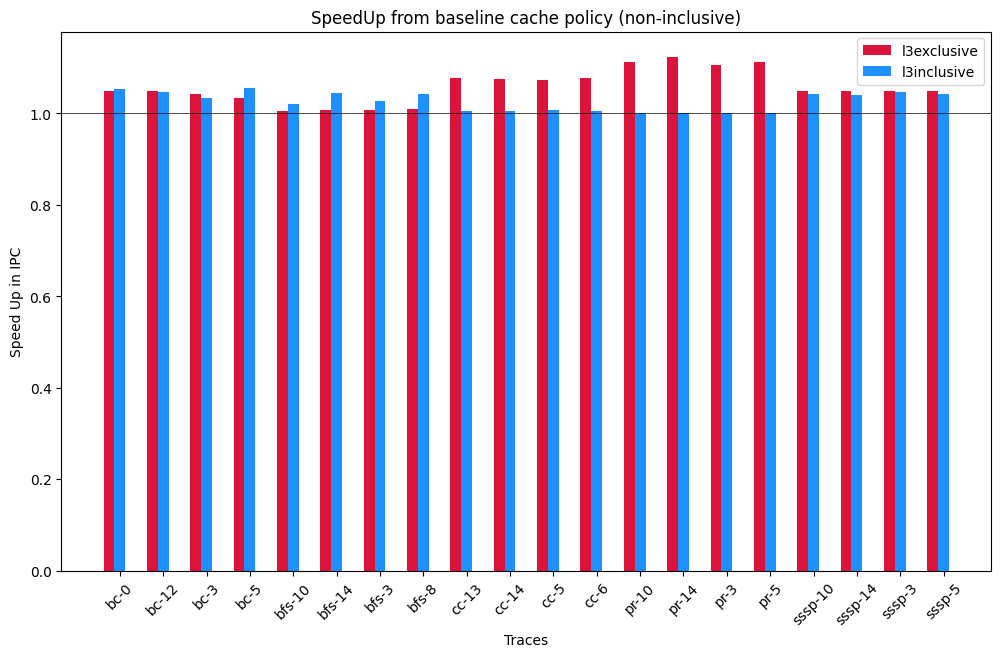

In [52]:
width = 0.25

l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i])/cache[i]) 
    l3inc[i] = ((l3inc[i])/cache[i]) 
    

plt.figure(figsize=(12,7))
bar1 = plt.bar(ind, l3ex, width, color = 'crimson')
bar2 = plt.bar(ind+width, l3inc, width, color='dodgerblue')
#bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
plt.axhline(y=1, color='black', linestyle='-', linewidth = 0.5)
  
plt.xlabel("Traces")
plt.ylabel('Speed Up in IPC')
plt.title("SpeedUp from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique(), rotation = 45)
plt.legend( (bar1, bar2), ('l3exclusive', 'l3inclusive') )
plt.savefig("speedUp_policyComparison.jpg")
plt.show()

### Percentage Improvement

Improvement = $\frac{IPC_{new} - IPC_{baseline}}{IPC_{baseline}} * 100$ 

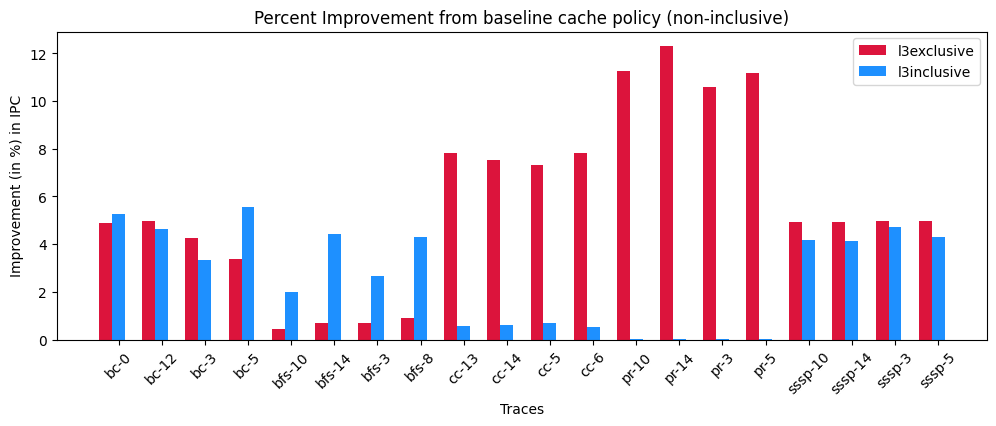

In [53]:
width = 0.3

l3ex = []
l3inc = []
cache = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i] - cache[i])/cache[i]) * 100
    l3inc[i] = ((l3inc[i] - cache[i])/cache[i]) * 100

plt.figure(figsize=(12,4))
bar1 = plt.bar(ind, l3ex, width, color = 'crimson')
bar2 = plt.bar(ind+width, l3inc, width, color='dodgerblue')
#bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
  
plt.xlabel("Traces")
plt.ylabel('Improvement (in %) in IPC')
plt.title("Percent Improvement from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique(), rotation = 45)
plt.legend( (bar1, bar2), ('l3exclusive', 'l3inclusive') )
plt.savefig("improvement_policyComparison.jpg")
plt.show()

In [57]:
c_size = pd.read_csv('../ChampSim/data_cache_size.csv')

llc_s = []
for i in c_size.index:
    llc_s.append(c_size['cache_size'][i] + ',' + str(c_size['llc_ways'][i]))
c_size['llc'] = llc_s
c_size

,cache_size,llc_ways,trace,ipc,llc
0,32mb100,8,bfs-8,0.331863,"32mb100,8"
1,32mb100,16,bfs-8,0.334450,"32mb100,16"
2,32mb100,32,bfs-8,0.334453,"32mb100,32"
3,32mb100,64,bfs-8,0.334453,"32mb100,64"
4,8mb40,8,bfs-8,0.282952,"8mb40,8"
5,8mb40,16,bfs-8,0.282269,"8mb40,16"
6,8mb40,32,bfs-8,0.281817,"8mb40,32"
7,8mb40,64,bfs-8,0.281746,"8mb40,64"
8,2mb20,8,bfs-8,0.311347,"2mb20,8"
9,2mb20,16,bfs-8,0.311025,"2mb20,16"


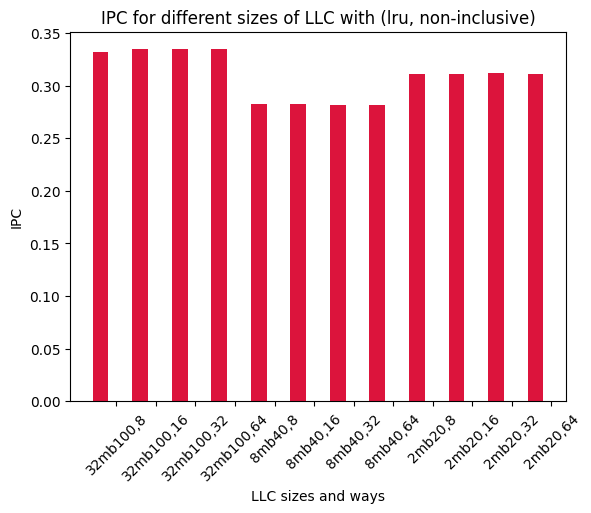

In [65]:
width = 0.4
bar4 = plt.bar(np.arange(12), c_size['ipc'], width, color = 'crimson')
plt.xlabel("LLC sizes and ways")
plt.ylabel('IPC')
plt.title("IPC for different sizes of LLC with (lru, non-inclusive)")

plt.xticks(np.arange(12)+width,c_size['llc'].unique(), rotation = 45)
plt.show()

## Analysis of different Cache replacement policies at different hierarchies

In [67]:
df1.head()

,replacement,hierarchy,trace,ipc
0,lru,l3exclusive,bc-0.trace.gz,0.135735
1,lru,l3exclusive,bc-12.trace.gz,0.132027
2,lru,l3exclusive,bc-3.trace.gz,0.157031
3,lru,l3exclusive,bc-5.trace.gz,0.208691
4,lru,l3exclusive,bfs-10.trace.gz,0.262584


In [68]:
print(df1['replacement'].unique())
df1.drop_duplicates(keep=False, inplace=True)

['lru' 'lfu' 'lfru' 'fifo' 'srrip' 'drrip' 'hawkeye' 'ship']


In [69]:
df2 = df1.groupby('trace')
pp = df2.get_group('pr-14.trace.gz')
pp = pp.sort_values(by = 'replacement')
l3ex =  pp.loc[pp['hierarchy'] == 'l3inclusive']['ipc'].tolist()
print(l3ex, max(l3ex))

[0.0711317, 0.05555, 0.0662452, 0.0633082, 0.0426913, 0.06131, 0.0650487] 0.0711317


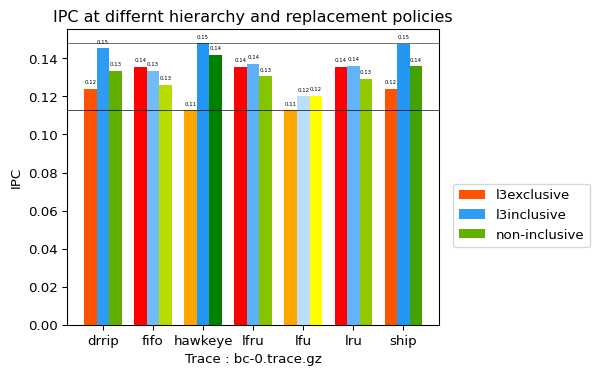

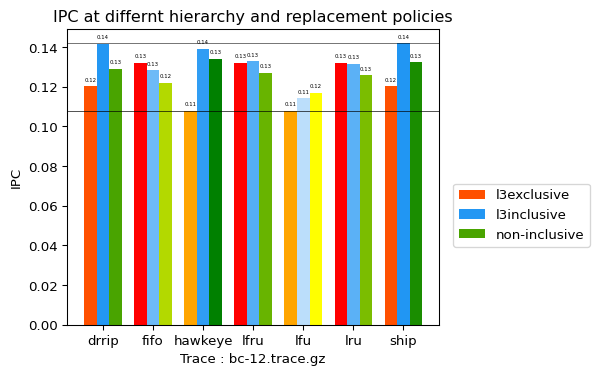

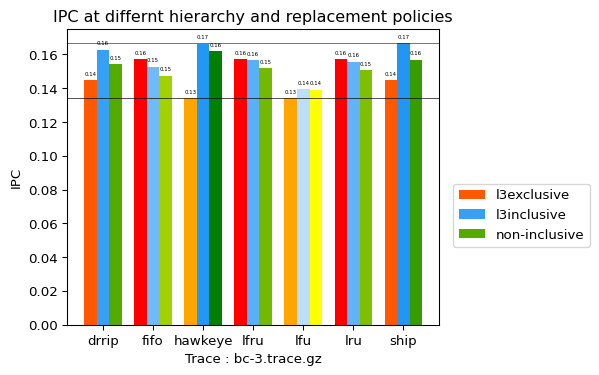

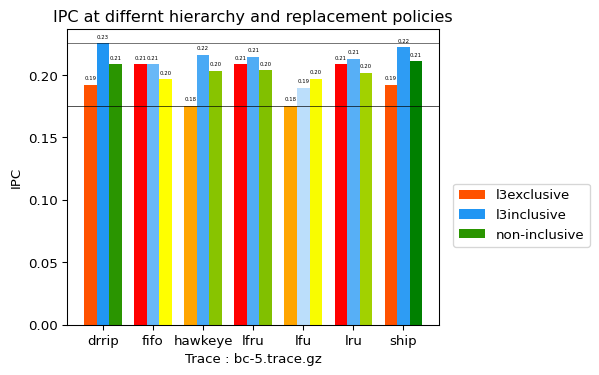

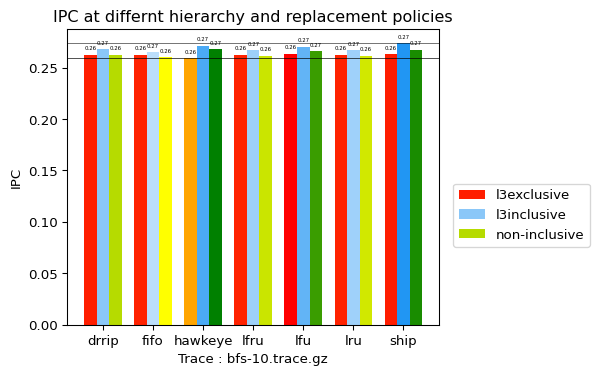

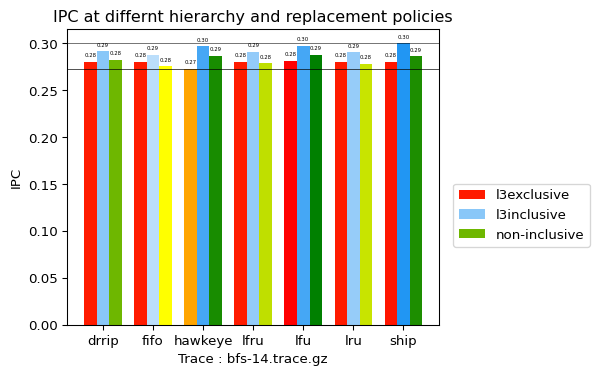

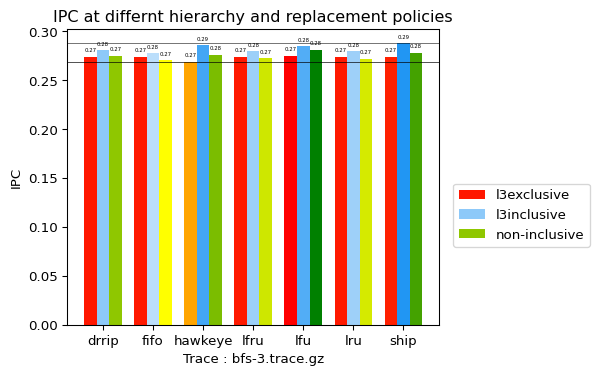

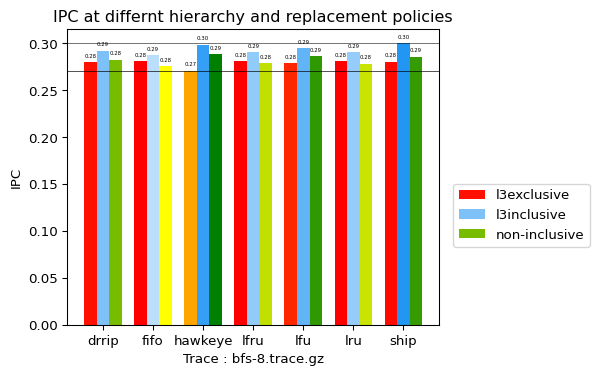

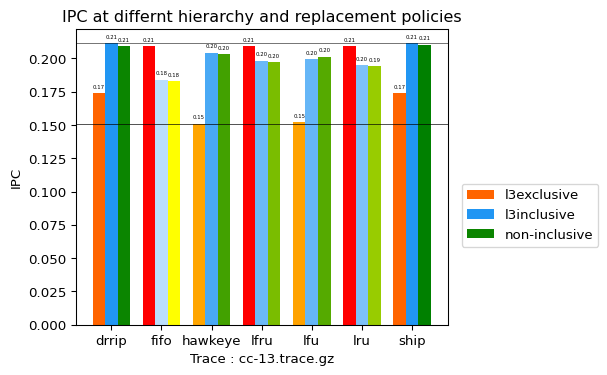

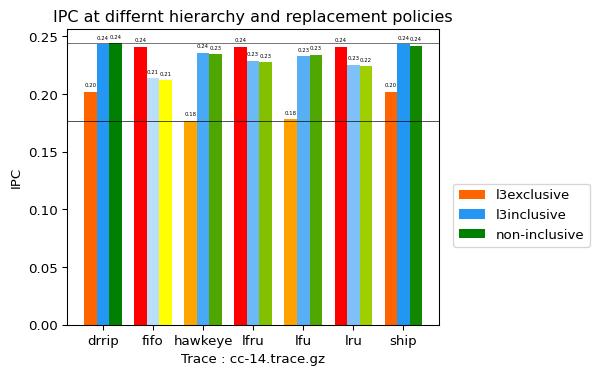

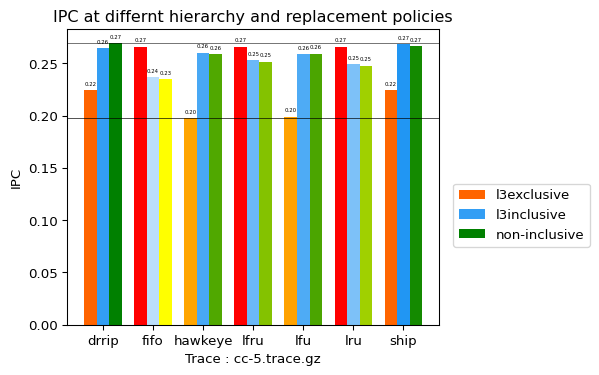

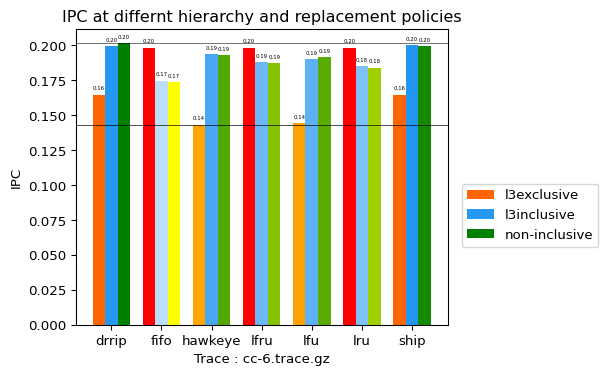

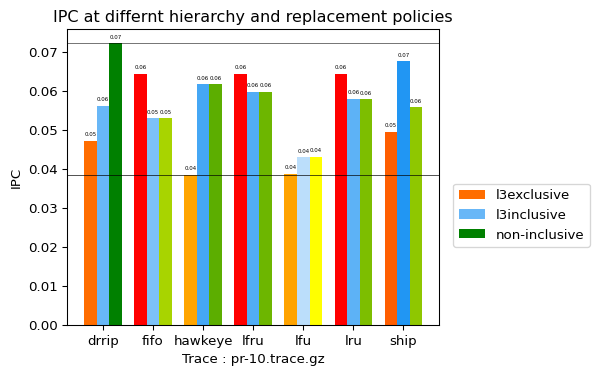

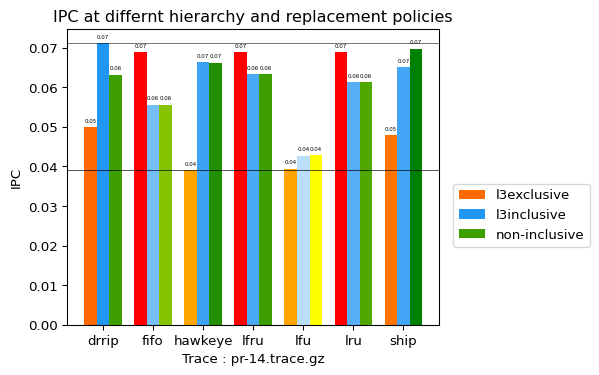

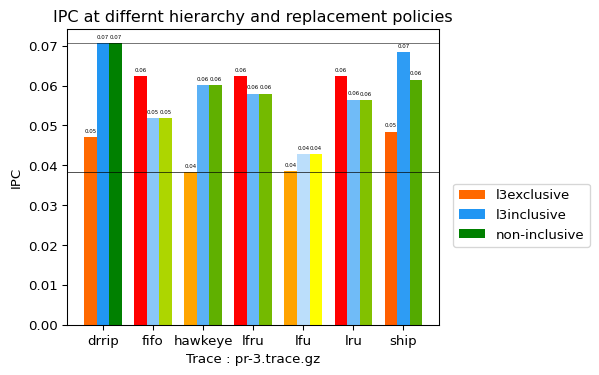

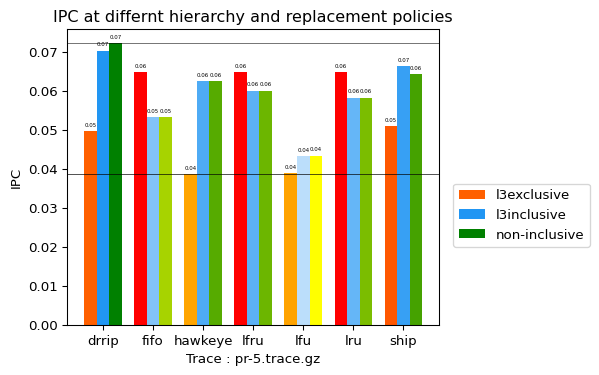

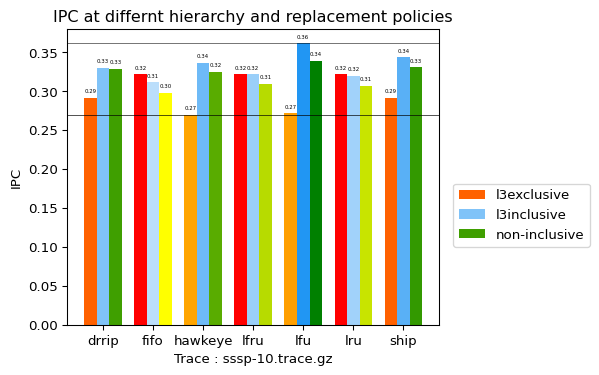

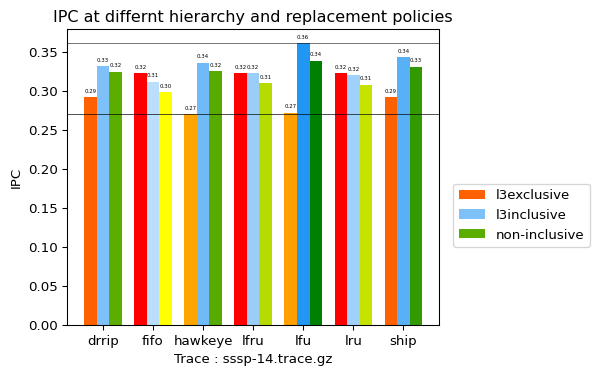

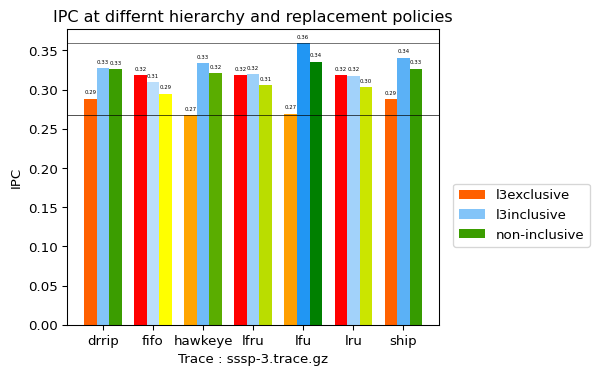

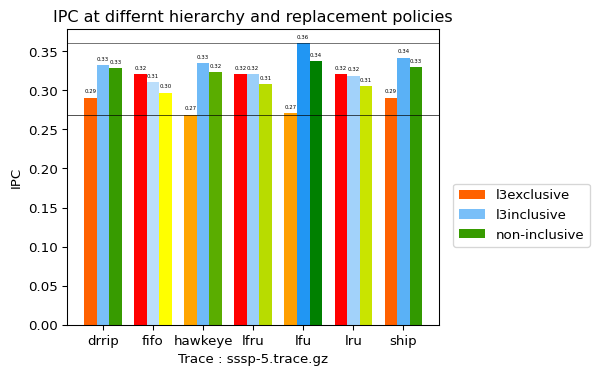

In [70]:
import matplotlib as mpl
width = 0.25

for j in df1['trace'].unique():
    new_df = df2.get_group(j)
    new_df = new_df.sort_values(by = 'replacement')
    l3ex =  new_df.loc[new_df['hierarchy'] == 'l3exclusive']['ipc'].tolist()
    l3inc = new_df.loc[new_df['hierarchy'] == 'l3inclusive']['ipc'].tolist()
    cache = new_df.loc[new_df['hierarchy'] == 'cache']['ipc'].tolist()
    # inc = new_df.loc[new_df['hierarchy'] == 'inclusive']['ipc'].tolist()
    if len(l3ex) != len(l3inc) or len(l3ex) != len(cache) or len(l3inc) != len(cache):
        print(j, l3ex, l3inc, cache)
        continue 
    max_val = max(max(l3inc), max(l3ex), max(cache))
    min_val = min(min(l3ex), min(cache), min(l3inc))
 
    N = len(l3ex)
    ind = np.arange(N) 
    # Colours - Choose the extreme colours of the colour map
    colours1 = ["#bbdefb", "#2196f3"]
    colours = ["orange", "red"]
    colours2 = ["yellow", "green"]

    # Colormap - Build the colour maps
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
    norm = mpl.colors.Normalize(min(l3ex), max(l3ex)) 
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours1, N=256)
    norm1 = mpl.colors.Normalize(min(l3inc), max(l3inc)) 
    cmap2 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours2, N=256)
    norm2 = mpl.colors.Normalize(min(cache), max(cache)) 
    fig, ax = plt.subplots(figsize=(5,4), dpi = 96)
    bar1 = ax.bar(ind, l3ex, width, color=cmap(norm(l3ex)))
    bar2 = ax.bar(ind+width, l3inc, width, color=cmap1(norm1(l3inc)))
    bar3 = ax.bar(ind+width*2, cache, width, color= cmap2(norm2(cache)))
    #bar4 = plt.bar(ind+width*3, inc[:5], width, color = 'orange')
    ax.axhline(y=max_val, color='black', linestyle='-', linewidth = 0.4)
    ax.axhline(y=min_val, color='black', linestyle='-', label = 'minimum IPC', linewidth = 0.5)
    plt.xlabel(f"Trace : {j}")
    plt.ylabel('IPC')
    plt.title("IPC at differnt hierarchy and replacement policies")
    plt.xticks(ind+width,new_df['replacement'].unique())
    ax.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'non-inclusive'), bbox_to_anchor =(1.02, 0.5) )
    ax.bar_label(bar1, labels=[f'{e:,.2f}' for e in l3ex], padding=3, color='black', fontsize=4) 
    ax.bar_label(bar2, labels=[f'{e:,.2f}' for e in l3inc], padding=3, color='black', fontsize=4) 
    ax.bar_label(bar3, labels=[f'{e:,.2f}' for e in cache], padding=3, color='black', fontsize=4) 

    # Add in red line and rectangle on top
    #plt.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
    #ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

    # Add in title and subtitle
    #plt.text(x=0.12, y=.93, s="SpeedUp", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    #plt.text(x=0.12, y=.90, s="something msmsm", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

    plt.show()
    # plt.savefig("ipc_policyComparison.jpg")

The following speedups and improvements/decrements are assuming LRU with Non-inclusive as Baseline 

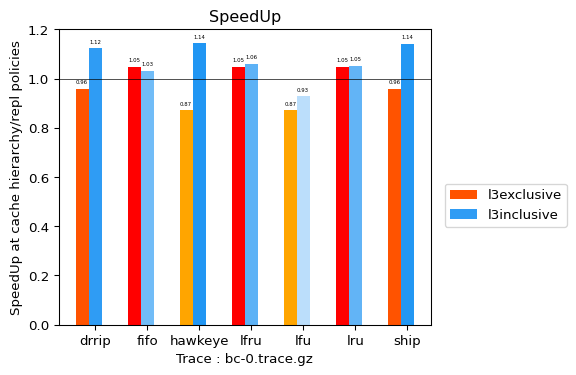

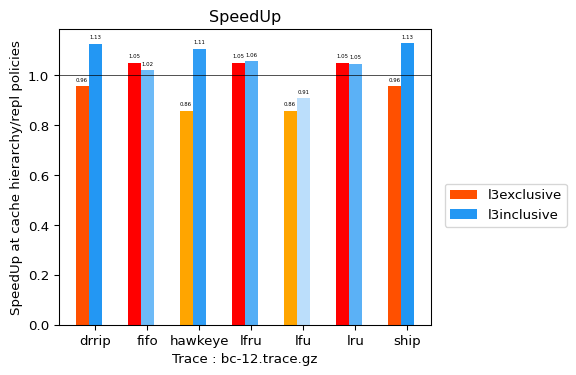

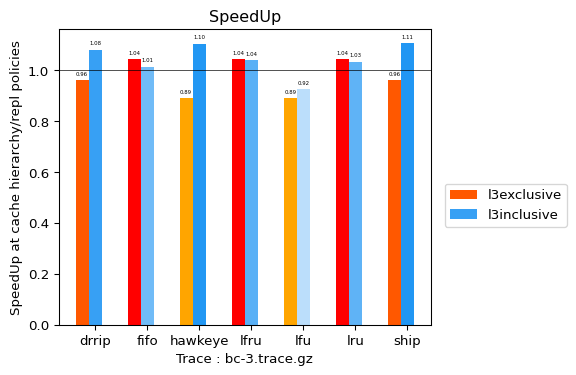

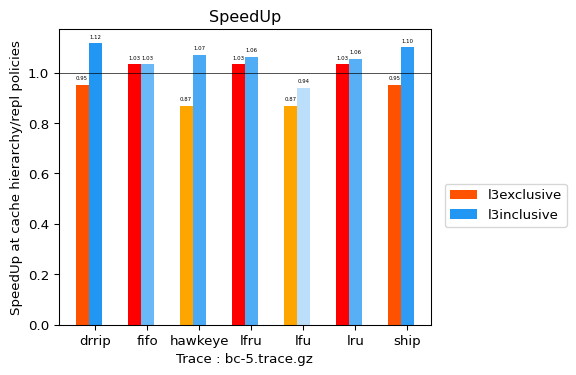

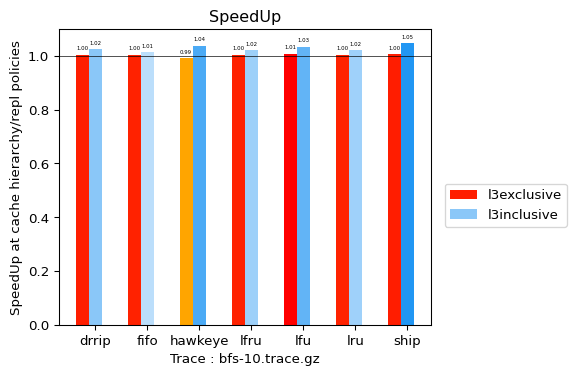

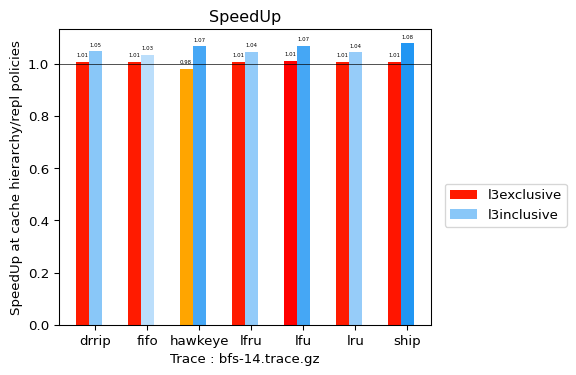

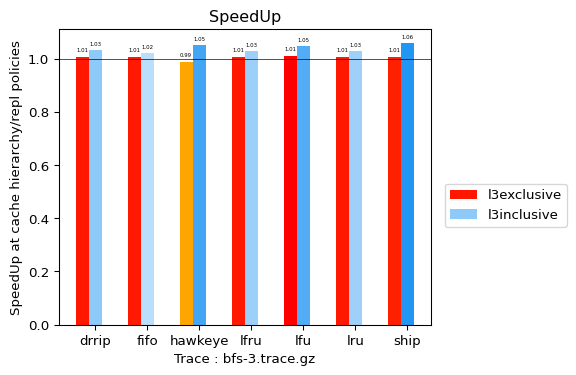

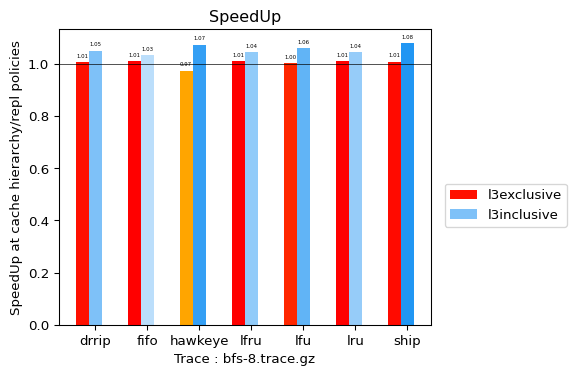

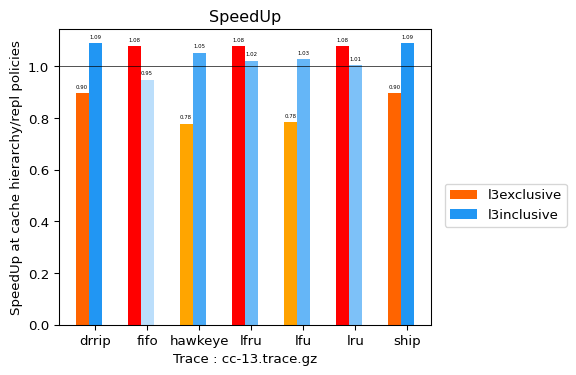

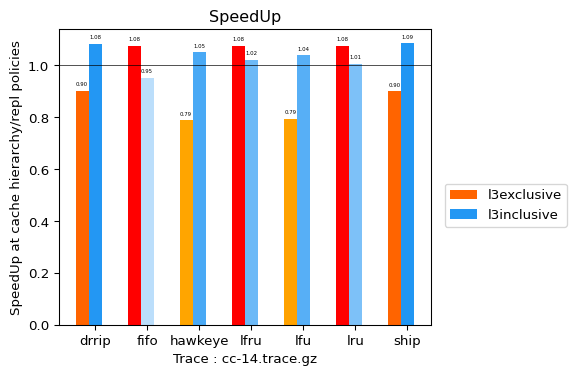

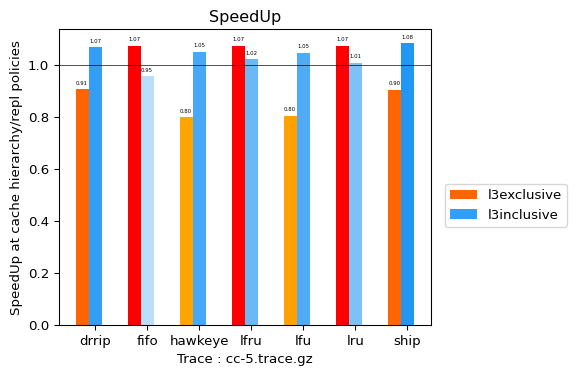

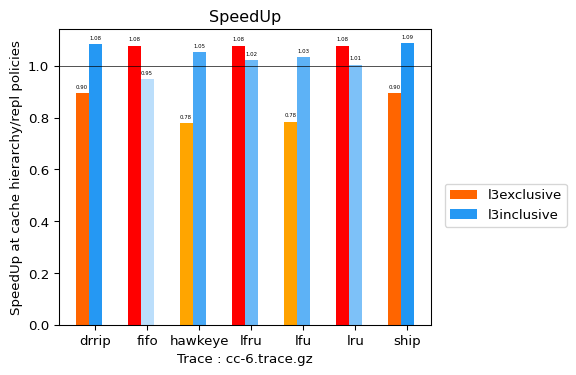

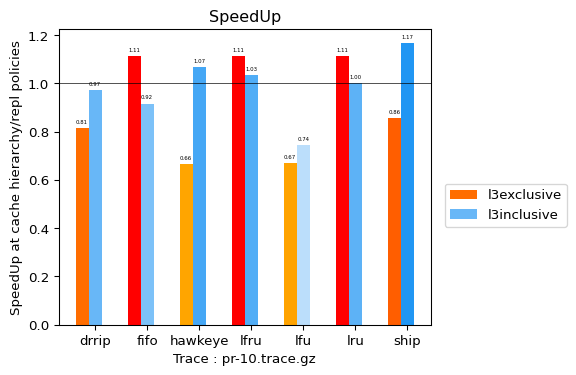

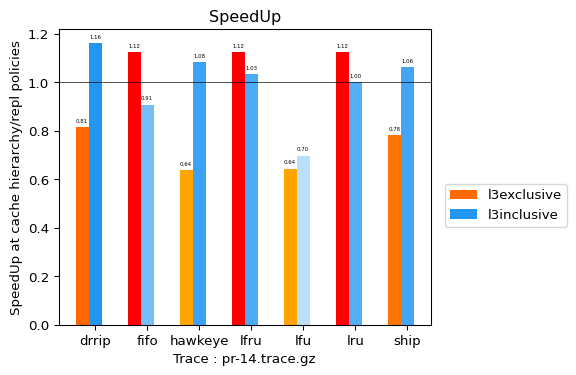

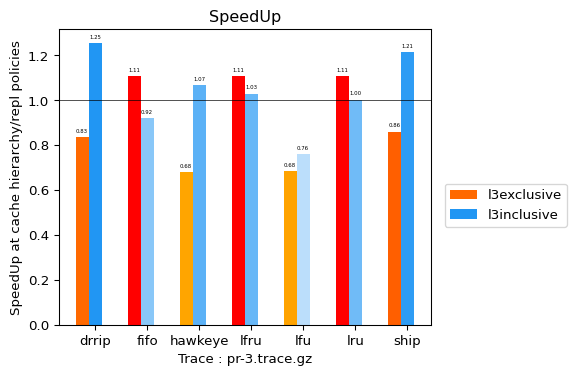

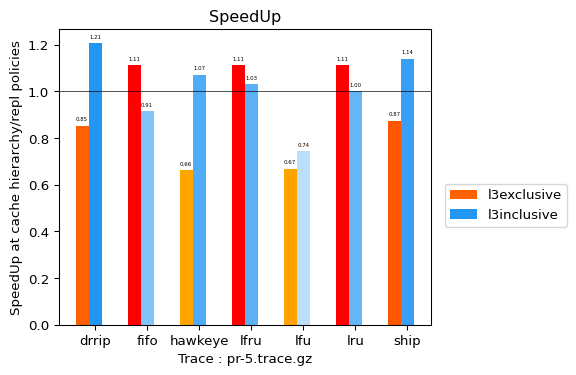

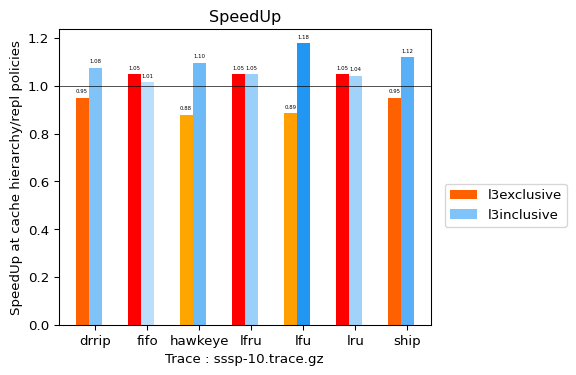

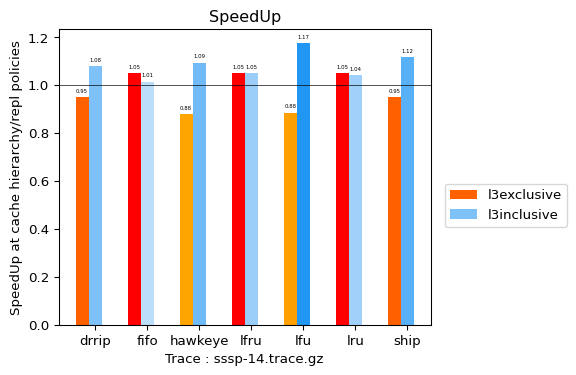

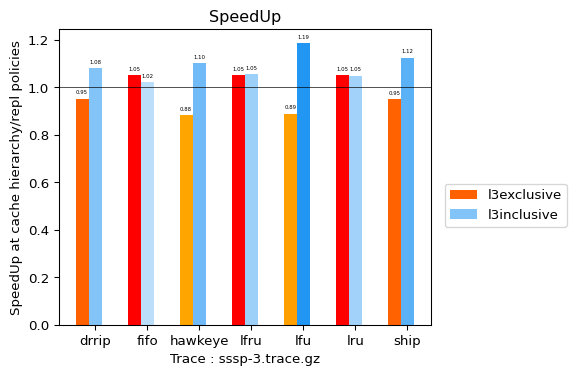

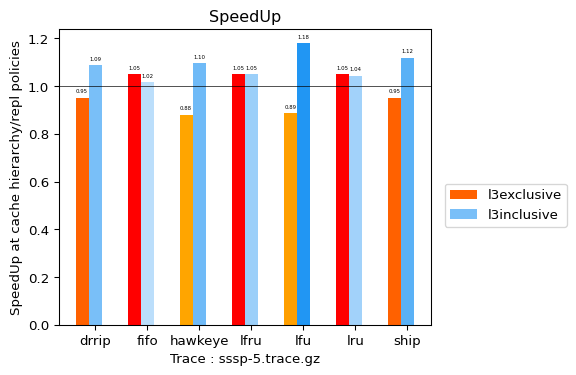

In [71]:
import matplotlib as mpl
width = 0.25
#plt.subplot(2,3)
for j in df1['trace'].unique():
    new_df = df2.get_group(j)
    new_df = new_df.sort_values(by = 'replacement')
    l3ex =  new_df.loc[new_df['hierarchy'] == 'l3exclusive']['ipc'].tolist()
    l3inc = new_df.loc[new_df['hierarchy'] == 'l3inclusive']['ipc'].tolist()
    cache = new_df.loc[new_df['hierarchy'] == 'cache']['ipc'].tolist()
    # inc = new_df.loc[new_df['hierarchy'] == 'inclusive']['ipc'].tolist()
    if len(l3ex) != len(l3inc) or len(l3ex) != len(cache) or len(l3inc) != len(cache):
        print(j, l3ex, l3inc, cache)
        continue 

    # for speed up
    for i in range(len(l3ex)):
        l3ex[i] = (l3ex[i]/cache[5])
        l3inc[i] = (l3inc[i]/cache[5])
    max_val = max(max(l3inc), max(l3ex))
    min_val = min(min(l3ex), min(l3inc))

    N = len(l3ex)
    ind = np.arange(N) 
    # Colours - Choose the extreme colours of the colour map
    colours1 = ["#bbdefb", "#2196f3"]
    colours = ["orange", "red"]
    colours2 = ["yellow", "green"]

    # Colormap - Build the colour maps
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
    norm = mpl.colors.Normalize(min(l3ex), max(l3ex)) 
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours1, N=256)
    norm1 = mpl.colors.Normalize(min(l3inc), max(l3inc)) 
    fig, ax = plt.subplots(figsize=(5,4), dpi = 96)
    bar1 = ax.bar(ind, l3ex, width, color=cmap(norm(l3ex)))
    bar2 = ax.bar(ind+width, l3inc, width, color=cmap1(norm1(l3inc)))

    ax.axhline(y=1, color='black', linestyle='-', linewidth = 0.5)
    plt.xlabel(f"Trace : {j}")
    plt.ylabel('SpeedUp at cache hierarchy/repl policies')
    plt.title("SpeedUp")
    plt.xticks(ind+width,new_df['replacement'].unique())
    ax.legend( (bar1, bar2), ('l3exclusive', 'l3inclusive'), bbox_to_anchor =(1.02, 0.5) )
    ax.bar_label(bar1, labels=[f'{e:,.2f}' for e in l3ex], padding=3, color='black', fontsize=4) 
    ax.bar_label(bar2, labels=[f'{e:,.2f}' for e in l3inc], padding=3, color='black', fontsize=4) 

    plt.show()
    # plt.savefig("ipc_policyComparison.jpg")

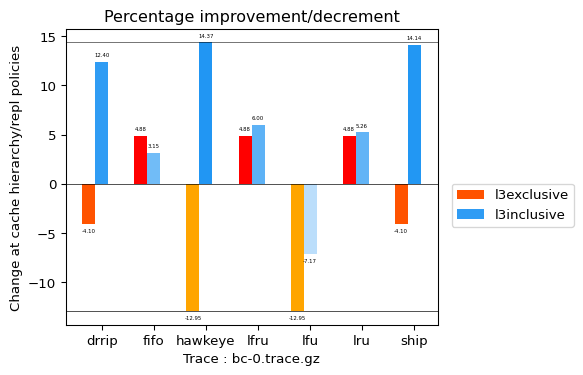

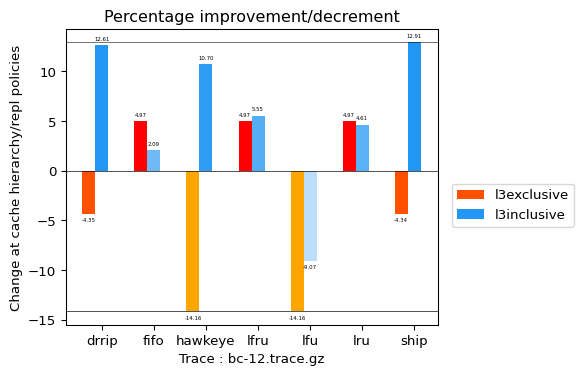

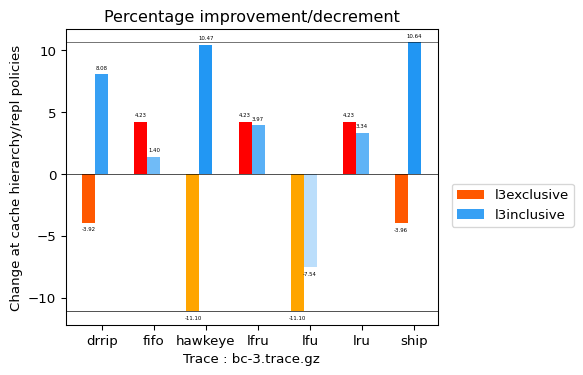

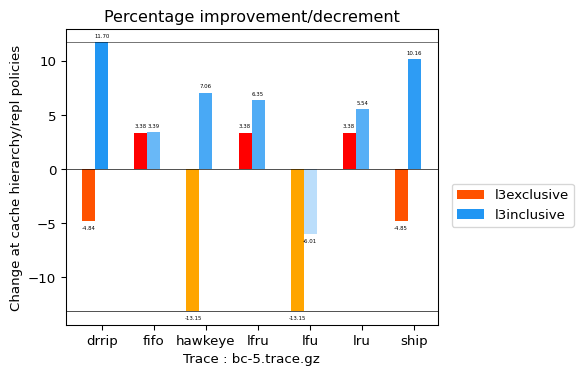

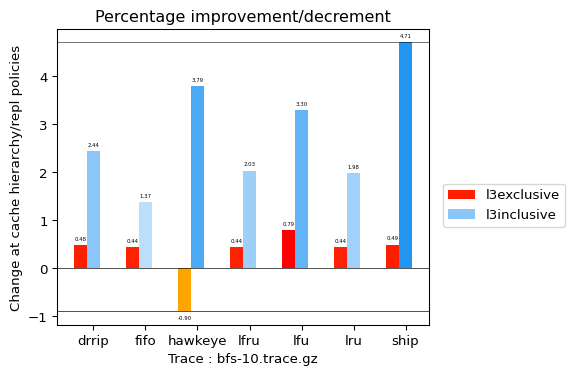

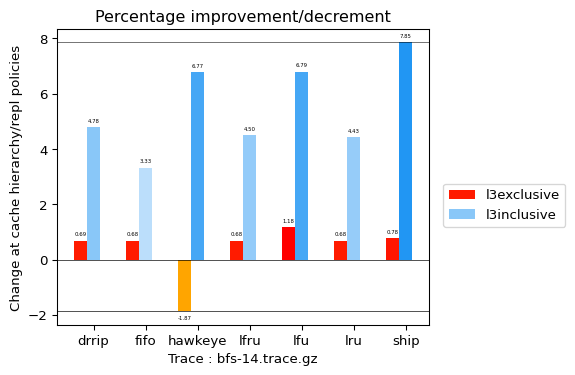

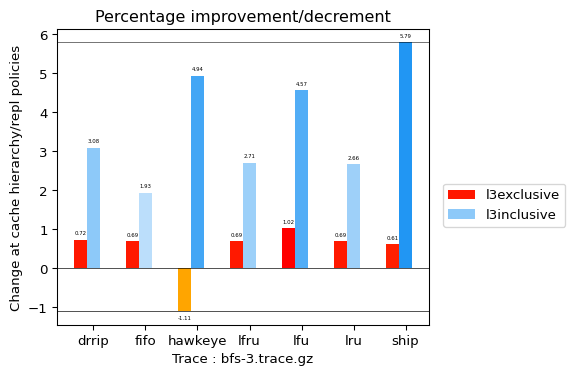

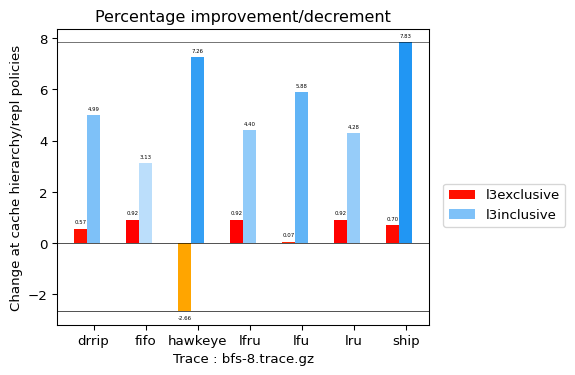

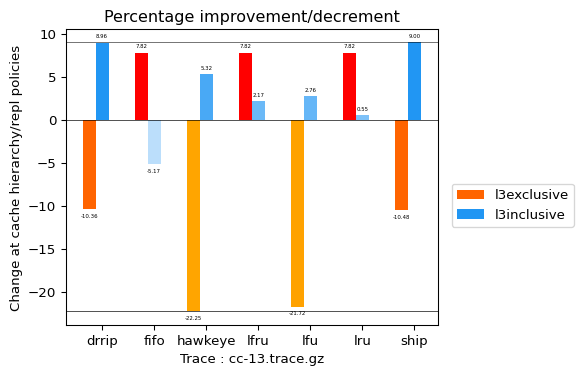

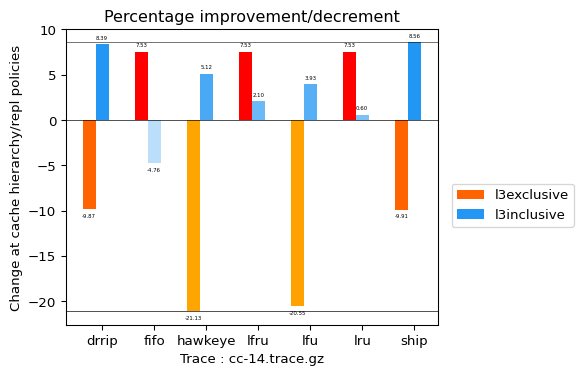

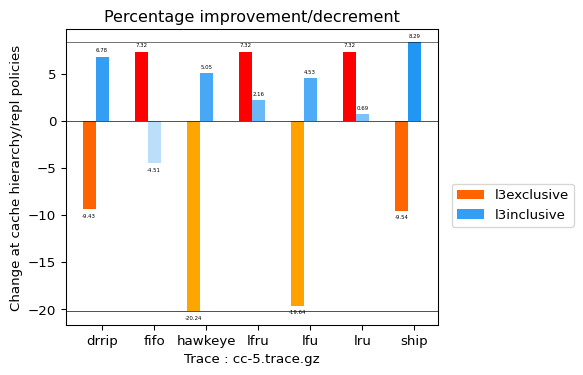

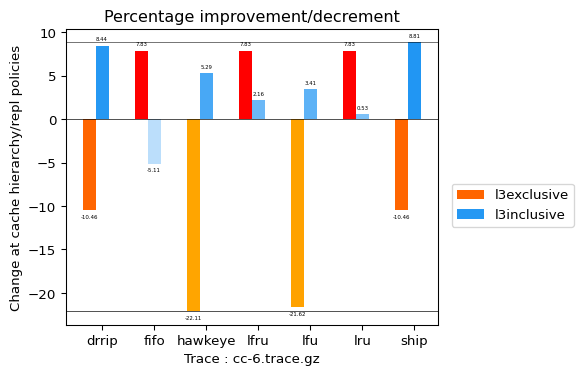

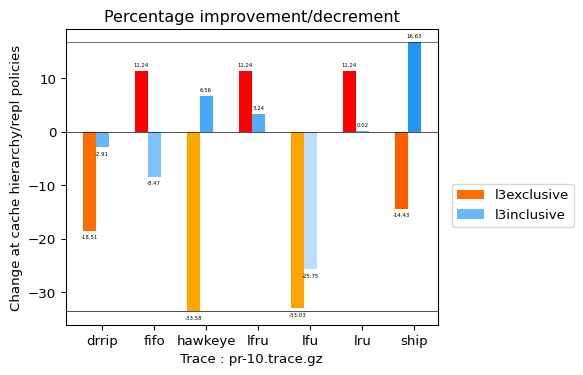

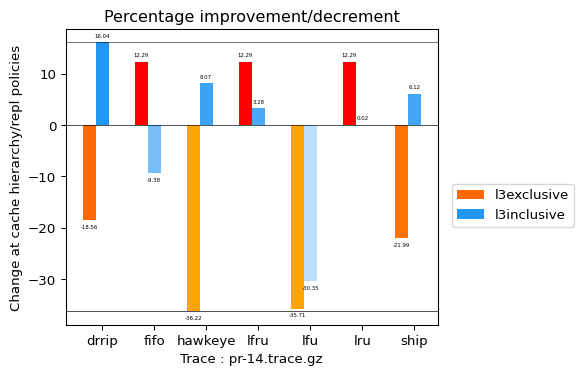

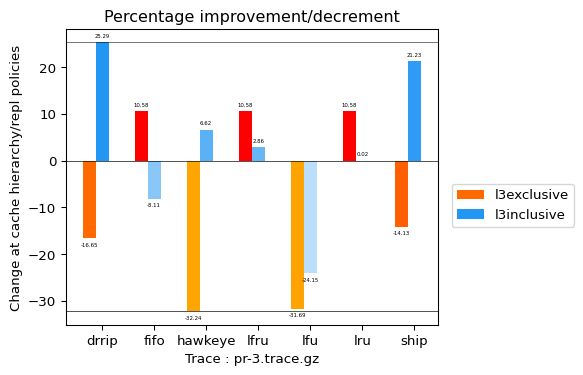

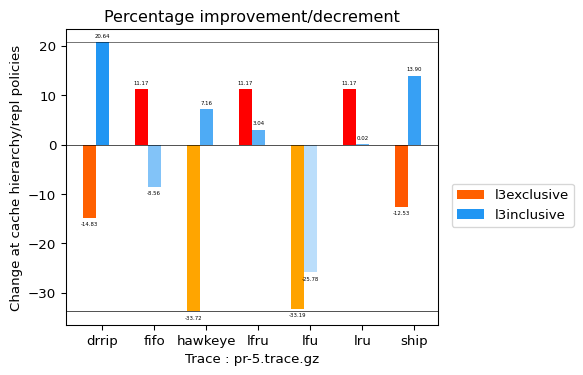

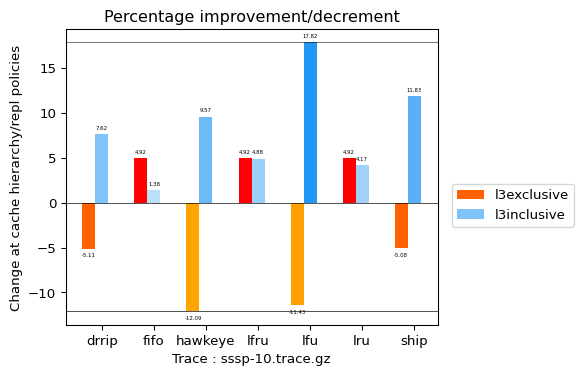

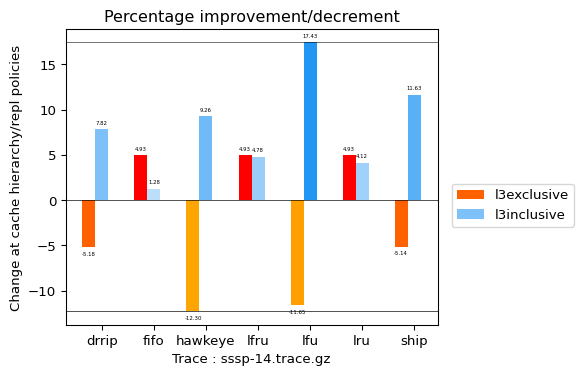

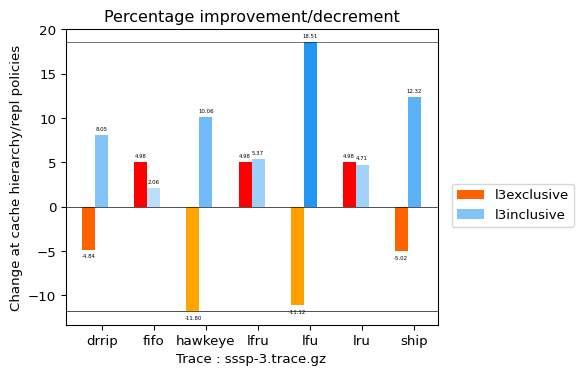

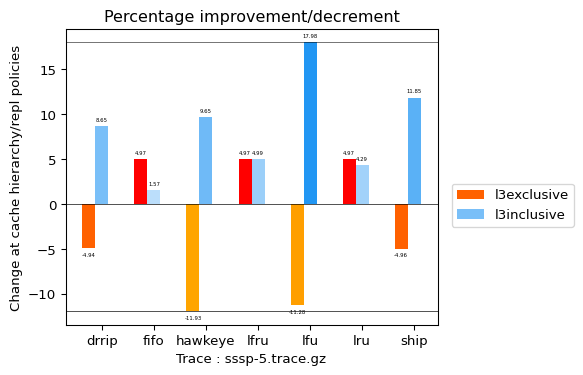

In [72]:
import matplotlib as mpl
width = 0.25

for j in df1['trace'].unique():
    new_df = df2.get_group(j)
    new_df = new_df.sort_values(by = 'replacement')
    l3ex =  new_df.loc[new_df['hierarchy'] == 'l3exclusive']['ipc'].tolist()
    l3inc = new_df.loc[new_df['hierarchy'] == 'l3inclusive']['ipc'].tolist()
    cache = new_df.loc[new_df['hierarchy'] == 'cache']['ipc'].tolist()
    # inc = new_df.loc[new_df['hierarchy'] == 'inclusive']['ipc'].tolist()
    if len(l3ex) != len(l3inc) or len(l3ex) != len(cache) or len(l3inc) != len(cache):
        print(j, l3ex, l3inc, cache)
        continue 
    # for % improvement
    for i in range(len(l3ex)):
        l3ex[i] = 100 *((l3ex[i] - cache[5]))/cache[5]
        l3inc[i] = 100 *((l3inc[i] - cache[5])/cache[5])
        #cache[i] = 0
    #for i in range(len(l3ex)):
    #    cache[i] = 0
    max_val = max(max(l3inc), max(l3ex))
    min_val = min(min(l3ex), min(l3inc))
    N = len(l3ex)
    ind = np.arange(N) 
    # Colours - Choose the extreme colours of the colour map
    colours1 = ["#bbdefb", "#2196f3"]
    colours = ["orange", "red"]
    colours2 = ["yellow", "green"]

    # Colormap - Build the colour maps
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
    norm = mpl.colors.Normalize(min(l3ex), max(l3ex)) 
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours1, N=256)
    norm1 = mpl.colors.Normalize(min(l3inc), max(l3inc)) 
    fig, ax = plt.subplots(figsize=(5,4), dpi = 96)
    bar1 = ax.bar(ind, l3ex, width, color=cmap(norm(l3ex)))
    bar2 = ax.bar(ind+width, l3inc, width, color=cmap1(norm1(l3inc)))

    ax.axhline(y=max_val, color='black', linestyle='-', linewidth = 0.4)
    ax.axhline(y=min_val, color='black', linestyle='-', label = 'minimum IPC', linewidth = 0.5)
    ax.axhline(y=0, color='black', linestyle='-', linewidth = 0.5)
    plt.xlabel(f"Trace : {j}")
    plt.ylabel('Change at cache hierarchy/repl policies')
    plt.title("Percentage improvement/decrement")
    plt.xticks(ind+width,new_df['replacement'].unique())
    ax.legend( (bar1, bar2), ('l3exclusive', 'l3inclusive'), bbox_to_anchor =(1.02, 0.5) )
    ax.bar_label(bar1, labels=[f'{e:,.2f}' for e in l3ex], padding=3, color='black', fontsize=4) 
    ax.bar_label(bar2, labels=[f'{e:,.2f}' for e in l3inc], padding=3, color='black', fontsize=4) 
    #ax.bar_label(bar3, labels=[f'{e:,.2f}' for e in cache], padding=3, color='black', fontsize=4) 

    plt.show()
    # plt.savefig("ipc_policyComparison.jpg")